# Import Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load Data

In [2]:
df_train = pd.read_csv("/kaggle/input/tabular-dataset-ready-for-malicious-url-detection/train_dataset.csv")
df_test = pd.read_csv("/kaggle/input/tabular-dataset-ready-for-malicious-url-detection/test_dataset.csv")

# Data cleaning and wrangling

In [3]:
df_train.head()

,url,label,source,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,...,pdomain_count_hyphen,pdomain_count_atrate,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot
0,irs-profilepaymentservice.com/home,1,phishtank,0,0,0,0,0,0,34,...,0,0,0,0,3,com,0,17,0,0
1,cpuggsukabumi.id,0,majestic_million,0,0,0,0,0,0,16,...,0,0,0,0,2,id,1,10,0,0
2,members.tripod.com/~don_rc/ring.htm,0,data_clean_test_mendel,0,0,0,0,0,0,35,...,0,0,0,0,3,com,0,2,7,0
3,optuswebmailadminprovider.weebly.com/,1,phishtank,0,0,0,1,0,0,37,...,0,0,0,0,3,com,0,3,25,0
4,topoz.com.pl,0,dmoz_harvard,0,0,0,0,0,0,12,...,0,0,0,0,6,com.pl,0,3,0,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6728848 entries, 0 to 6728847
Data columns (total 60 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   url                                  object 
 1   label                                int64  
 2   source                               object 
 3   url_has_login                        int64  
 4   url_has_client                       int64  
 5   url_has_server                       int64  
 6   url_has_admin                        int64  
 7   url_has_ip                           int64  
 8   url_isshorted                        int64  
 9   url_len                              int64  
 10  url_entropy                          float64
 11  url_hamming_1                        float64
 12  url_hamming_00                       float64
 13  url_hamming_10                       float64
 14  url_hamming_01                       float64
 15  url_hamming_11                  

In [5]:
df_train.isnull().sum()

url                                    0
label                                  0
source                                 0
url_has_login                          0
url_has_client                         0
url_has_server                         0
url_has_admin                          0
url_has_ip                             0
url_isshorted                          0
url_len                                0
url_entropy                            0
url_hamming_1                          0
url_hamming_00                         0
url_hamming_10                         0
url_hamming_01                         0
url_hamming_11                         0
url_2bentropy                          0
url_3bentropy                          0
url_count_dot                          0
url_count_https                        0
url_count_http                         0
url_count_perc                         0
url_count_hyphen                       0
url_count_www                          0
url_count_atrate

In [6]:
df_train.duplicated().sum()

0

In [7]:
df_train.describe()

,label,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,url_entropy,url_hamming_1,...,pdomain_len,pdomain_count_hyphen,pdomain_count_atrate,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot
count,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,...,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06
mean,2.148470e-01,1.562987e-02,2.001531e-03,2.242137e-03,3.648916e-03,3.619342e-03,5.041279e-02,2.375615e+01,3.526806e+00,5.344584e-01,...,7.831950e-05,8.916831e-07,2.972277e-07,1.263218e-05,2.615604e-05,3.102813e+00,8.032742e-02,6.647128e+00,2.272318e+00,4.740574e-02
std,4.107162e-01,1.240386e-01,4.469369e-02,4.729810e-02,6.029595e-02,6.005200e-02,2.187952e-01,3.337858e+01,4.597844e-01,2.811646e-02,...,4.065377e-02,1.219073e-03,7.710093e-04,6.058669e-03,1.608065e-02,1.128592e+00,2.717994e-01,3.770186e+00,6.371737e+00,3.166550e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,-0.000000e+00,2.777778e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01,3.238901e+00,5.168269e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,3.506891e+00,5.351562e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,3.788755e+00,5.526316e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.394000e+03,5.378801e+00,7.350746e-01,...,5.800000e+01,2.000000e+00,2.000000e+00,5.000000e+00,1.100000e+01,2.900000e+01,1.000000e+00,6.100000e+01,2.370000e+02,3.700000e+01


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682213 entries, 0 to 1682212
Data columns (total 60 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   url                                  1682213 non-null  object 
 1   label                                1682213 non-null  int64  
 2   source                               1682213 non-null  object 
 3   url_has_login                        1682213 non-null  int64  
 4   url_has_client                       1682213 non-null  int64  
 5   url_has_server                       1682213 non-null  int64  
 6   url_has_admin                        1682213 non-null  int64  
 7   url_has_ip                           1682213 non-null  int64  
 8   url_isshorted                        1682213 non-null  int64  
 9   url_len                              1682213 non-null  int64  
 10  url_entropy                          1682213 non-null  float64
 11

In [9]:
# Label Encoding for df_train
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Loop over each column and encode it separately
for col in ['url', 'source', 'tld']:
    try:
        df_train[col] = label_encoder.fit_transform(df_train[col])
    except KeyboardInterrupt:
        print("Encoding interrupted. You may need to optimize the process.")
        break

In [16]:
# Label Encoding for df_test
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Loop over each column and encode it separately
for col in ['url', 'source', 'tld']:
    try:
        df_test[col] = label_encoder.fit_transform(df_test[col])
    except KeyboardInterrupt:
        print("Encoding interrupted. You may need to optimize the process.")
        break

In [17]:
# Separate features and target variable for train data
X_train = df_train.drop(['label'], axis=1)  # Dropping 'url' and 'tld' as they are non-numeric
y_train = df_train['label']

In [18]:
# Separate features and target variable for train data
X_test = df_test.drop(['label'], axis=1)  # Dropping 'url' and 'tld' as they are non-numeric
y_test = df_test['label']

# Model Building and Prediction

In [13]:
# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the preprocessed training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the validation set
y_test_pred = model.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_test_pred)
print("Validation Set Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Validation Set Accuracy: 0.954288190615576

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1320794
           1       0.83      0.98      0.90    361419

    accuracy                           0.95   1682213
   macro avg       0.91      0.96      0.94   1682213
weighted avg       0.96      0.95      0.96   1682213


Confusion Matrix:
[[1250030   70764]
 [   6133  355286]]


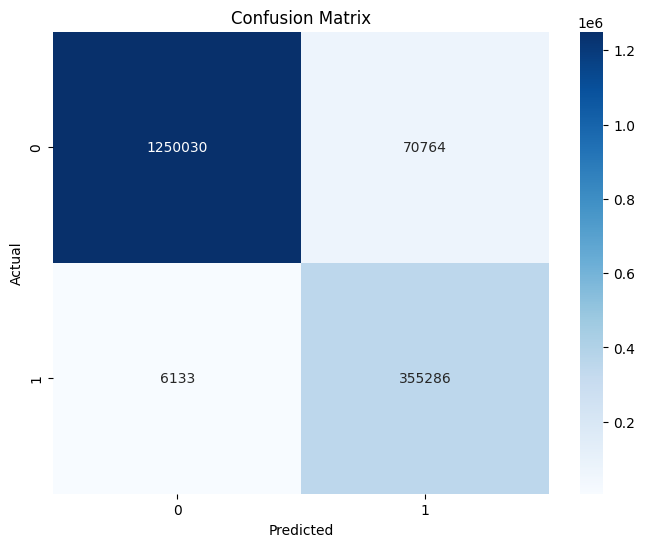

In [30]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save Model

In [22]:
# Save the model to a file
joblib.dump(model, 'model.pkl')

['model.pkl']

In [23]:
joblib.dump(model, 'model.pkl', compress=True)

['model.pkl']